# Text Processing - Yelp 2021

## Imports and Global Settings

In [25]:
# Common Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Main NLP libraries
import nltk
# Wordclouds
from wordcloud import WordCloud, STOPWORDS
# Reading Level and Basic Stats
import textstat
from nltk.corpus import stopwords as nltk_stopwords



pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Import Data

In [2]:
file_location = "../data/full_data/analytics_ready/"
filename = "text_data.json"

In [3]:
# 6907890 records available
num_records_to_load = 10000

In [4]:
df = pd.read_json(file_location + filename, nrows=num_records_to_load, orient="records", lines=True)

## Pre-Processing

In [5]:
df.head(5)

,review_id,review_stars,review_text,target_ufc_bool,target_ufc_count
0,---zlFD4Kgfatr0SbDh_zg,4,Been looking for a halfway decent Chinese/Amer...,False,0
1,--BcxYRlOpG0v7nVQWseYA,4,I visited Kyma last week for the first time an...,False,0
2,--KO46TSxWzv32x00s5w9Q,5,It might be the most expensive gelato I've eve...,False,0
3,--XNrIWxRUafMsGqzB5o0g,5,"Love this place! They have great antiques, be...",True,1
4,--aGgQu9HVva6F9fB2-0ew,4,Great salad and cold sandwich.. The soup is am...,False,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         10000 non-null  object
 1   review_stars      10000 non-null  int64 
 2   review_text       10000 non-null  object
 3   target_ufc_bool   10000 non-null  object
 4   target_ufc_count  10000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 390.8+ KB


In [7]:
df.target_ufc_bool.value_counts()

True     5134
False    4866
Name: target_ufc_bool, dtype: int64

## Splitting Text

In [8]:
corpus = df.review_text
Q_corpus = df[df["target_ufc_bool"] == "True"]["review_text"]
NQ_corpus = df[df["target_ufc_bool"] == "False"]["review_text"]
print(f'Corpus Size: Total:{corpus.size}, Quality:{Q_corpus.size}, Not Quality:{NQ_corpus.size}')

Corpus Size: Total:10000, Quality:5134, Not Quality:4866


## WordClouds

### Wordcloud Stopwords

In [9]:
stopwords = set(STOPWORDS)
stopwords.update([])

#### Join Corpus Into One String

In [10]:
Q_text = " ".join(review for review in Q_corpus)
NQ_text = " ".join(review for review in NQ_corpus)

### Make Wordclouds

In [11]:
Q_wordcloud = WordCloud(stopwords=stopwords, background_color="cornflowerblue", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(Q_text)

In [12]:
NQ_wordcloud = WordCloud(stopwords=stopwords, background_color="lightcoral", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(NQ_text)

### Save and Show Wordclouds

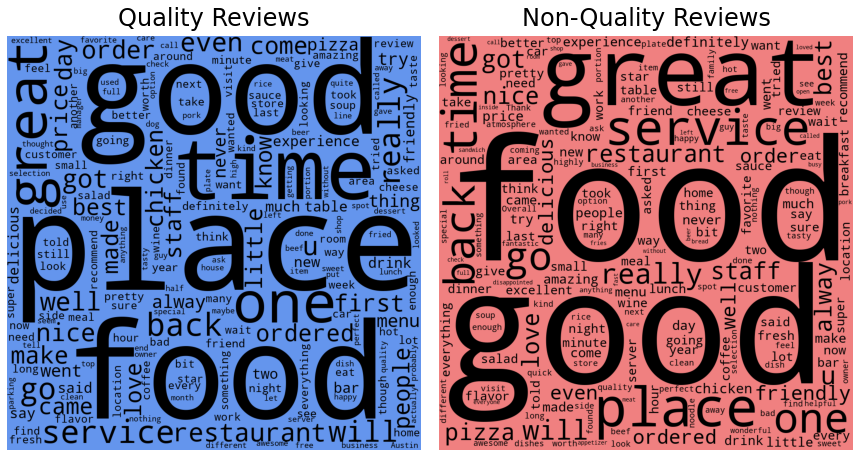

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.imshow(Q_wordcloud)
ax1.axis("off")
ax1.set_title("Quality Reviews", fontsize=24, pad=10)


ax2.imshow(NQ_wordcloud)
ax2.axis("off")
ax2.set_title("Non-Quality Reviews", fontsize=24, pad=10)

fig.tight_layout(pad=0)

# plt.savefig('../images/review_wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

## Basic Info

In [19]:
text = df.copy()

#### Feature Creation Stopwords

In [28]:
feature_stopwords = nltk_stopwords.words('english')

In [31]:
text['word_count'] = text['review_text'].apply(lambda x: len(str(x).split(" ")))
text['character_count'] = text['review_text'].str.len()

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

text['avg_word_length'] = text['review_text'].apply(lambda x: avg_word(x))
text['num_count'] = text['review_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
text['uppercase_count'] = text['review_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
text['#_@_count'] = text['review_text'].apply(lambda x: len([x for x in x.split() if x.startswith('#') or x.startswith('@')]))
text['stopword_count'] = text['review_text'].apply(lambda x: len([x for x in x.split() if x in feature_stopwords]))

In [32]:
text["sentence_count"] = text["review_text"].apply(textstat.sentence_count)
text["lexicon_count"] = text["review_text"].apply(textstat.lexicon_count)
text["syllable_count"] = text["review_text"].apply(textstat.syllable_count)

In [33]:
text.info()
text.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         10000 non-null  object 
 1   review_stars      10000 non-null  int64  
 2   review_text       10000 non-null  object 
 3   target_ufc_bool   10000 non-null  object 
 4   target_ufc_count  10000 non-null  int64  
 5   word_count        10000 non-null  int64  
 6   character_count   10000 non-null  int64  
 7   avg_word_length   10000 non-null  float64
 8   num_count         10000 non-null  int64  
 9   uppercase_count   10000 non-null  int64  
 10  #_@_count         10000 non-null  int64  
 11  stopword_count    10000 non-null  int64  
 12  sentence_count    10000 non-null  int64  
 13  lexicon_count     10000 non-null  int64  
 14  syllable_count    10000 non-null  int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 1.1+ MB


,review_id,review_stars,review_text,target_ufc_bool,target_ufc_count,word_count,character_count,avg_word_length,num_count,uppercase_count,#_@_count,stopword_count,sentence_count,lexicon_count,syllable_count
0,---zlFD4Kgfatr0SbDh_zg,4,Been looking for a halfway decent Chinese/Amer...,False,0,37,198,4.37838,0,0,0,12,3,37,47
1,--BcxYRlOpG0v7nVQWseYA,4,I visited Kyma last week for the first time an...,False,0,98,553,4.65306,3,2,0,39,6,98,138
2,--KO46TSxWzv32x00s5w9Q,5,It might be the most expensive gelato I've eve...,False,0,44,240,4.47727,0,0,0,20,4,44,62
3,--XNrIWxRUafMsGqzB5o0g,5,"Love this place! They have great antiques, be...",True,1,117,593,4.29730,2,1,0,52,1,110,143
4,--aGgQu9HVva6F9fB2-0ew,4,Great salad and cold sandwich.. The soup is am...,False,0,19,101,4.36842,0,0,0,6,3,19,24


## Reading Level

In [34]:
text["grade_level"] = text["review_text"].apply(textstat.flesch_kincaid_grade)

In [35]:
text.info()
text.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         10000 non-null  object 
 1   review_stars      10000 non-null  int64  
 2   review_text       10000 non-null  object 
 3   target_ufc_bool   10000 non-null  object 
 4   target_ufc_count  10000 non-null  int64  
 5   word_count        10000 non-null  int64  
 6   character_count   10000 non-null  int64  
 7   avg_word_length   10000 non-null  float64
 8   num_count         10000 non-null  int64  
 9   uppercase_count   10000 non-null  int64  
 10  #_@_count         10000 non-null  int64  
 11  stopword_count    10000 non-null  int64  
 12  sentence_count    10000 non-null  int64  
 13  lexicon_count     10000 non-null  int64  
 14  syllable_count    10000 non-null  int64  
 15  grade_level       10000 non-null  float64
dtypes: float64(2), int64(11), object(3)
memor

,review_id,review_stars,review_text,target_ufc_bool,target_ufc_count,word_count,character_count,avg_word_length,num_count,uppercase_count,#_@_count,stopword_count,sentence_count,lexicon_count,syllable_count,grade_level
0,---zlFD4Kgfatr0SbDh_zg,4,Been looking for a halfway decent Chinese/Amer...,False,0,37,198,4.37838,0,0,0,12,3,37,47,4.50000
1,--BcxYRlOpG0v7nVQWseYA,4,I visited Kyma last week for the first time an...,False,0,98,553,4.65306,3,2,0,39,6,98,138,7.30000
2,--KO46TSxWzv32x00s5w9Q,5,It might be the most expensive gelato I've eve...,False,0,44,240,4.47727,0,0,0,20,4,44,62,5.20000
3,--XNrIWxRUafMsGqzB5o0g,5,"Love this place! They have great antiques, be...",True,1,117,593,4.29730,2,1,0,52,1,110,143,42.70000
4,--aGgQu9HVva6F9fB2-0ew,4,Great salad and cold sandwich.. The soup is am...,False,0,19,101,4.36842,0,0,0,6,3,19,24,2.20000


## Sentiment Analysis

## Word Embeddings

## Topic Modeling

## Classification Using Classical Machine Learning